## Importação da base de dados bruta

In [139]:
import pandas as pd
import holidays
import datetime
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import FunctionTransformer

In [140]:
df = pd.read_excel(r"D:\Dissertação\dissertacao_pgmc\Dados\Dados brutos\Base de dados TCC_anonimizada.xlsx", header= 0, sheet_name="Dados", engine= 'openpyxl')
df.sort_values("REAL - Entrada").head(15)


,BRM,agrup_veiculo,tipo_expedicao,int_tipo_expedicao,ponto_descarga,peso,bin_varricao,REAL - Entrada,Data_entrada,qtd_veiculos_dia,qtd_veiculos_dentro,OUTLIER,Quinzena,REAL - Saída,tempo_varricao,dia_semana,semana_mes,tpv_usina,num_mes,Previsto - Permanência
1721,209005,1.0,08,NaN,PONTO5,41770,0,2021-01-02 05:34:02.381,2021-01-02,12,0,0,1,2021-01-02 07:47:23.458,0.00,6,1,2.22,1,4.40
1948,209006,1.0,75,75.0,PONTO3,52280,1,2021-01-02 05:50:05.901,2021-01-02,12,1,0,1,2021-01-02 08:49:18.965,0.79,6,1,2.99,1,4.52
1823,209025,1.0,12,12.0,PONTO1,45260,1,2021-01-02 09:24:14.942,2021-01-02,12,0,0,1,2021-01-02 12:07:02.519,0.50,6,1,2.71,1,4.40
2626,209035,7.0,57,57.0,PONTO8,32530,0,2021-01-02 11:36:03.375,2021-01-02,12,1,0,1,2021-01-02 13:06:51.874,0.00,6,1,1.51,1,4.40
2270,209029,8.0,35,35.0,DEDICADOS,48060,1,2021-01-02 11:39:07.109,2021-01-02,12,2,0,1,2021-01-02 14:28:49.136,0.47,6,1,2.83,1,4.40
2224,209034,8.0,35,35.0,PONTO3,38870,1,2021-01-02 13:10:31.831,2021-01-02,12,1,0,1,2021-01-02 14:54:07.719,0.60,6,1,1.73,1,4.40
838,209036,7.0,55,55.0,GUSA BÁSC,72770,0,2021-01-02 13:16:39.456,2021-01-02,12,2,0,1,2021-01-02 14:22:55.215,0.00,6,1,1.10,1,4.73
2846,209037,7.0,57,57.0,DEDICADOS,38390,0,2021-01-02 13:57:39.006,2021-01-02,12,3,0,1,2021-01-02 15:53:29.697,0.00,6,1,1.93,1,4.40
2941,209039,7.0,55,55.0,PONTO6,47770,1,2021-01-02 14:20:23.780,2021-01-02,12,4,0,1,2021-01-02 17:16:45.876,0.46,6,1,2.94,1,4.40
2842,209038,1.0,12,12.0,PONTO1,54630,1,2021-01-02 14:31:20.805,2021-01-02,12,3,0,1,2021-01-02 18:03:34.980,0.00,6,1,3.54,1,4.55


In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23974 entries, 0 to 23973
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   BRM                     23974 non-null  int64         
 1   agrup_veiculo           23475 non-null  float64       
 2   tipo_expedicao          23900 non-null  object        
 3   int_tipo_expedicao      21884 non-null  float64       
 4   ponto_descarga          23902 non-null  object        
 5   peso                    23974 non-null  int64         
 6   bin_varricao            23974 non-null  int64         
 7   REAL - Entrada          23974 non-null  datetime64[ns]
 8   Data_entrada            23974 non-null  datetime64[ns]
 9   qtd_veiculos_dia        23974 non-null  int64         
 10  qtd_veiculos_dentro     23974 non-null  int64         
 11  OUTLIER                 23974 non-null  int64         
 12  Quinzena                23974 non-null  int64 

In [142]:
df['REAL - Saída'].min()

Timestamp('2021-01-02 07:47:23.458000')

In [143]:
df['REAL - Saída'].max()

Timestamp('2021-09-30 23:04:59.003000')

## Criação do novo dataframe

### Agrupando a saída em intervalos de 30 minutos

In [144]:
df_novo = pd.DataFrame(df.groupby(pd.Grouper(key='REAL - Saída', freq='30T'))['tpv_usina'].mean())
df_novo.reset_index(inplace=True)
df_novo['Dia'] = pd.to_datetime(df_novo['REAL - Saída'].dt.strftime('%Y-%m-%d'))

### Garantindo que cada janela do dia receba o valor do indicador

In [145]:
df_novo = df_novo.groupby(pd.Grouper(key='Dia', freq='D')).ffill()
df_novo.set_index("REAL - Saída", inplace= True)


### Criando a média acumulada do TPV

In [146]:
df_novo['tpv_media_acum'] = df_novo.groupby(df_novo.index.date)['tpv_usina'].cumsum() / (df_novo.groupby(df_novo.index.date)['tpv_usina'].cumcount() + 1)
df_novo['tpv_media_acum'].fillna(0, inplace=True)

## Enriquecimento da base

## Criando lags para o TPV

In [147]:
df_novo['lag_1h'] = df_novo['tpv_media_acum'].shift(freq='1H')
df_novo['lag_1d'] = df_novo['tpv_media_acum'].shift(freq='1D')
df_novo['lag_7d'] = df_novo['tpv_media_acum'].shift(freq='7D')

### Feriados

In [148]:
feriados = holidays.Brazil()

In [149]:

def is_feriado(data):
  """Verifica se a data é feriado no Brasil."""
  return data.date() in feriados 

# Criando a coluna de feriados e preenchendo com falsos
df_novo['feriado'] = False

# Aplicando a funcao para receber True caso seja feriado
for index, row in df_novo.iterrows():

  data = row.name
  df_novo.at[index, 'feriado'] = is_feriado(data)

In [150]:
def enriqueceDatetime(data):
    data['dia_semana'] = data.index.weekday
    data['mes'] = data.index.month
    data['hora'] = data.index.hour
    

    #Monday is 0 and Sunday is 6


enriqueceDatetime(df_novo)

In [151]:
df_novo.head(5)


,tpv_usina,tpv_media_acum,lag_1h,lag_1d,lag_7d,feriado,dia_semana,mes,hora
REAL - Saída,,,,,,,,,
2021-01-02 07:30:00,2.22,2.220000,NaN,NaN,NaN,False,5,1,7
2021-01-02 08:00:00,2.22,2.220000,NaN,NaN,NaN,False,5,1,8
2021-01-02 08:30:00,2.99,2.476667,2.220000,NaN,NaN,False,5,1,8
2021-01-02 09:00:00,2.99,2.605000,2.220000,NaN,NaN,False,5,1,9
2021-01-02 09:30:00,2.99,2.682000,2.476667,NaN,NaN,False,5,1,9


### Fim de semana

In [152]:
def fim_de_semana(data):

    dia = data.weekday()

    return dia >= 5

In [153]:
# Aplicando a funcao para receber True caso seja fim de semana
for index, row in df_novo.iterrows():

  data = row.name
  df_novo.at[index, 'fim_semana'] = fim_de_semana(data)

C:\Users\thevh\AppData\Local\Temp/ipykernel_5320/3152377570.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'True' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_novo.at[index, 'fim_semana'] = fim_de_semana(data)


In [154]:
df_novo.head(5)


,tpv_usina,tpv_media_acum,lag_1h,lag_1d,lag_7d,feriado,dia_semana,mes,hora,fim_semana
REAL - Saída,,,,,,,,,,
2021-01-02 07:30:00,2.22,2.220000,NaN,NaN,NaN,False,5,1,7,True
2021-01-02 08:00:00,2.22,2.220000,NaN,NaN,NaN,False,5,1,8,True
2021-01-02 08:30:00,2.99,2.476667,2.220000,NaN,NaN,False,5,1,8,True
2021-01-02 09:00:00,2.99,2.605000,2.220000,NaN,NaN,False,5,1,9,True
2021-01-02 09:30:00,2.99,2.682000,2.476667,NaN,NaN,False,5,1,9,True


### Quinzena

In [155]:
def primeira_quinzena(data):

    dia = data.day

    return dia < 15

In [156]:
# Aplicando a funcao para receber True caso seja primeira quinzena
for index, row in df_novo.iterrows():

  data = row.name
  df_novo.at[index, 'primeira_quinzena'] = primeira_quinzena(data)

C:\Users\thevh\AppData\Local\Temp/ipykernel_5320/2020051742.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'True' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_novo.at[index, 'primeira_quinzena'] = primeira_quinzena(data)


### Quantidade de veículos dentro da usina

In [157]:
def calculaQtdVeiculosUsina(df):

    entrada = df.groupby(pd.Grouper(key='REAL - Entrada', freq='30T'))['BRM'].count()
    saida = df.groupby(pd.Grouper(key='REAL - Saída', freq='30T'))['BRM'].count()

    # Criar DataFrame teste com os resultados agrupados
    df_aux = pd.DataFrame({
        'Entrada': entrada,
        'Saída': saida
    })

    df_aux.fillna(0, inplace= True)
    df_aux = df_aux.astype(int)

    # Calcular soma acumulada para Entrada e Saída
    df_aux['Entrada_acum'] = df_aux['Entrada'].cumsum()
    df_aux['Saída_acum'] = df_aux['Saída'].cumsum()

    # Calcular a quantidade de veículos na usina (saldo)
    df_aux['QTD_VEICULOS_USINA'] = (df_aux['Entrada_acum'] - df_aux['Saída_acum']).clip(lower=0)

    df_aux.drop(columns=['Entrada', 'Saída', 'Entrada_acum', 'Saída_acum'], inplace= True)

    return df_aux

df_novo = df_novo.join(calculaQtdVeiculosUsina(df))

In [158]:
df_novo.head()

,tpv_usina,tpv_media_acum,lag_1h,lag_1d,lag_7d,feriado,dia_semana,mes,hora,fim_semana,primeira_quinzena,QTD_VEICULOS_USINA
REAL - Saída,,,,,,,,,,,,
2021-01-02 07:30:00,2.22,2.220000,NaN,NaN,NaN,False,5,1,7,True,True,1
2021-01-02 08:00:00,2.22,2.220000,NaN,NaN,NaN,False,5,1,8,True,True,1
2021-01-02 08:30:00,2.99,2.476667,2.220000,NaN,NaN,False,5,1,8,True,True,0
2021-01-02 09:00:00,2.99,2.605000,2.220000,NaN,NaN,False,5,1,9,True,True,1
2021-01-02 09:30:00,2.99,2.682000,2.476667,NaN,NaN,False,5,1,9,True,True,1


### Removendo linhas com valores nulos

In [159]:
df_novo = df_novo.dropna()

In [160]:
df_novo.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10271 entries, 2021-01-09 07:30:00 to 2021-09-30 23:00:00
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tpv_usina           10271 non-null  float64
 1   tpv_media_acum      10271 non-null  float64
 2   lag_1h              10271 non-null  float64
 3   lag_1d              10271 non-null  float64
 4   lag_7d              10271 non-null  float64
 5   feriado             10271 non-null  bool   
 6   dia_semana          10271 non-null  int32  
 7   mes                 10271 non-null  int32  
 8   hora                10271 non-null  int32  
 9   fim_semana          10271 non-null  object 
 10  primeira_quinzena   10271 non-null  object 
 11  QTD_VEICULOS_USINA  10271 non-null  int32  
dtypes: bool(1), float64(5), int32(4), object(2)
memory usage: 812.5+ KB


## Seno e Cosseno de variáveis periódicas

In [161]:
# Função de transformação senoidal
def sin_transformer(period):
    return lambda x: np.sin(2 * np.pi * x / period)

# Função de transformação cosenoidal
def cos_transformer(period):
    return lambda x: np.cos(2 * np.pi * x / period)

df_novo = df_novo.copy()

# Aplicação das transformações
df_novo["hora_sin"] = df_novo["hora"].apply(sin_transformer(24))
df_novo["hora_cos"] = df_novo["hora"].apply(cos_transformer(24))
df_novo["dia_semana_sin"] = df_novo["dia_semana"].apply(sin_transformer(7))
df_novo["dia_semana_cos"] = df_novo["dia_semana"].apply(cos_transformer(7))

# Análise exploratória

### Média de TPV por horário durante dias da semana

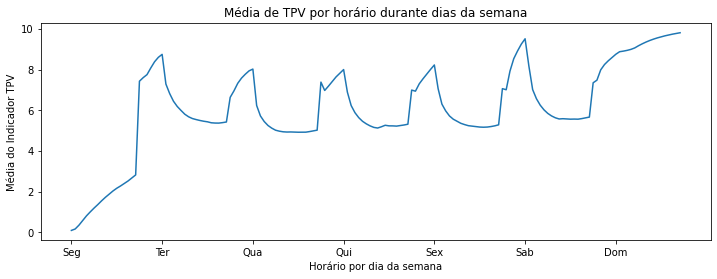

In [162]:
fig, ax = plt.subplots(figsize=(12, 4))

TPV = df_novo.groupby(['dia_semana', 'hora'])['tpv_media_acum'].mean()
TPV.plot(ax= ax)
_ = ax.set(
    title = "Média de TPV por horário durante dias da semana",
    xticks = [i * 24 for i in range(7)],
    xticklabels = ['Seg', 'Ter', 'Qua', 'Qui', 'Sex', 'Sab', 'Dom'],
    xlabel = "Horário por dia da semana",
    ylabel = "Média do Indicador TPV"
)

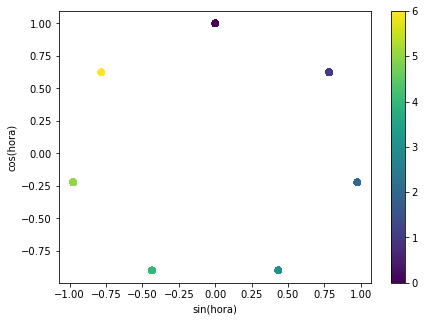

In [163]:
fig, ax = plt.subplots(figsize=(7, 5))
sp = ax.scatter(df_novo["dia_semana_sin"], df_novo["dia_semana_cos"], c=df_novo["dia_semana"])
ax.set(
    xlabel="sin(hora)",
    ylabel="cos(hora)",
)
_ = fig.colorbar(sp)

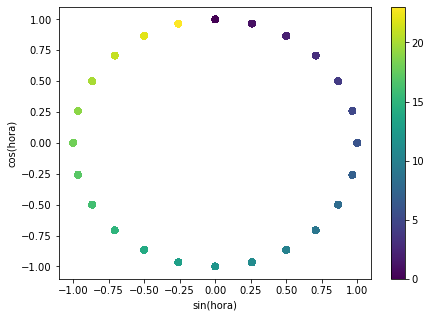

In [164]:
fig, ax = plt.subplots(figsize=(7, 5))
sp = ax.scatter(df_novo["hora_sin"], df_novo["hora_cos"], c=df_novo["hora"])
ax.set(
    xlabel="sin(hora)",
    ylabel="cos(hora)",
)
_ = fig.colorbar(sp)

## Exportando a base

In [165]:
df_novo.reset_index(drop=True, inplace= True)
df_novo.drop(columns= ['tpv_usina'], inplace= True)
df_novo.rename(columns={'tpv_media_acum': 'TPV'}, inplace = True)

In [166]:
df_novo = df_novo[['mes', 
                   'hora_sin',
                   'hora_cos',
                   'dia_semana_sin',
                   'dia_semana_cos',
                   'QTD_VEICULOS_USINA',
                   'primeira_quinzena',
                   'feriado',
                   'fim_semana',
                   'lag_1h',
                   'lag_1d',
                   'lag_7d',
                   'TPV']]
df_novo.replace({True: 1, False: 0}, inplace=True)

display(df_novo.tail(10))
df_novo.info()


,mes,hora_sin,hora_cos,dia_semana_sin,dia_semana_cos,QTD_VEICULOS_USINA,primeira_quinzena,feriado,fim_semana,lag_1h,lag_1d,lag_7d,TPV
10261,9,-1.000000,-1.836970e-16,0.433884,-0.900969,17,0,0,0,5.392522,2.680110,1.948193,5.296995
10262,9,-0.965926,2.588190e-01,0.433884,-0.900969,14,0,0,0,5.314954,2.768825,1.946829,5.220918
10263,9,-0.965926,2.588190e-01,0.433884,-0.900969,7,0,0,0,5.296995,2.828479,2.008325,5.191181
10264,9,-0.866025,5.000000e-01,0.433884,-0.900969,6,0,0,0,5.220918,2.875931,2.078610,5.122616
10265,9,-0.866025,5.000000e-01,0.433884,-0.900969,4,0,0,0,5.191181,2.917774,2.145548,5.093982
10266,9,-0.707107,7.071068e-01,0.433884,-0.900969,3,0,0,0,5.122616,2.957671,2.209372,5.101796
10267,9,-0.707107,7.071068e-01,0.433884,-0.900969,3,0,0,0,5.093982,3.016587,2.270295,5.109255
10268,9,-0.500000,8.660254e-01,0.433884,-0.900969,2,0,0,0,5.101796,3.067774,2.328511,5.135939
10269,9,-0.500000,8.660254e-01,0.433884,-0.900969,1,0,0,0,5.109255,3.111736,2.384196,5.145592
10270,9,-0.258819,9.659258e-01,0.433884,-0.900969,0,0,0,0,5.135939,3.153826,2.437511,5.200792


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10271 entries, 0 to 10270
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   mes                 10271 non-null  int32  
 1   hora_sin            10271 non-null  float64
 2   hora_cos            10271 non-null  float64
 3   dia_semana_sin      10271 non-null  float64
 4   dia_semana_cos      10271 non-null  float64
 5   QTD_VEICULOS_USINA  10271 non-null  int32  
 6   primeira_quinzena   10271 non-null  int64  
 7   feriado             10271 non-null  int64  
 8   fim_semana          10271 non-null  int64  
 9   lag_1h              10271 non-null  float64
 10  lag_1d              10271 non-null  float64
 11  lag_7d              10271 non-null  float64
 12  TPV                 10271 non-null  float64
dtypes: float64(8), int32(2), int64(3)
memory usage: 963.0 KB


In [167]:
df_novo.to_csv(r'D:\Dissertação\dissertacao_pgmc\Dados\Dados refinados\timeseries.csv')

In [174]:
treino = round(df_novo.shape[0]*0.5)

In [186]:
val = round(df_novo.shape[0]*0.3) + treino

In [188]:
teste = round(df_novo.shape[0]*0.2) + val

In [187]:
df_novo.iloc[treino:val].shape

(3081, 13)

In [189]:
df_novo.iloc[val:].shape

(2054, 13)